### Random Forest Algorithm: Step-by-Step Explanation

Random Forest is an ensemble learning method primarily used for classification and regression tasks. It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Below is a step-by-step explanation of the key concepts and steps involved in the Random Forest algorithm.

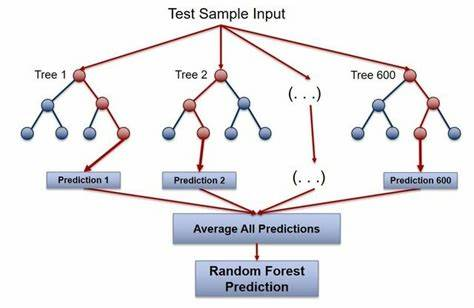

#### Key Concepts:

1. **Decision Trees**: 
   - Basic building block of Random Forest. A decision tree is a flowchart-like tree structure where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents the outcome.
   
2. **Ensemble Learning**: 
   - Combines the predictions of multiple models (decision trees) to produce a final prediction. Ensemble methods are known for improving the performance and robustness of models.
   
3. **Bagging (Bootstrap Aggregating)**:
   - Technique used to create multiple subsets of the original dataset with replacement. Each subset is used to train a separate decision tree.

4. **Random Feature Selection**:
   - In Random Forest, each tree is allowed to choose a random subset of features to split at each node. This helps to reduce the correlation between individual trees, making the forest more diverse and robust.

5. **Voting (for Classification)**:
   - Each tree in the forest gives a classification output, and the final class is determined by majority voting.

6. **Averaging (for Regression)**:
   - Each tree in the forest gives a numerical output, and the final prediction is obtained by averaging the outputs of all trees.

#### Steps in Building a Random Forest:

1. **Data Preparation**:
   - Split the dataset into training and testing sets.
   
2. **Create Multiple Bootstrapped Samples**:
   - Randomly select samples from the training dataset with replacement to create multiple bootstrapped datasets.

3. **Train Decision Trees on Bootstrapped Samples**:
   - For each bootstrapped sample, grow a decision tree. During tree construction, at each split, a random subset of features is considered for splitting.

4. **Aggregate Predictions**:
   - For classification: Each tree votes for a class, and the majority class is taken as the final prediction.
   - For regression: The average of all tree outputs is taken as the final prediction.

#### Example Code for Random Forest Classification:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
rf_classifier = RandomForestClassifier(random_state=42)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Fit the model
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters and best score
print("Best parameters found by Grid Search:", grid_search.best_params_)
print("Best Grid Search score:", grid_search.best_score_)

In [ ]:
# Predict on the test data
y_pred = grid_search.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

#### Example Code for Random Forest Regression:

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load the Boston housing dataset
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the model
rf_regressor = RandomForestRegressor(random_state=42)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Set up the GridSearchCV
grid_search_reg = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# Fit the model
grid_search_reg.fit(X_train, y_train)

In [ ]:
# Print the best parameters and best score
print("Best parameters found by Grid Search:", grid_search_reg.best_params_)
print("Best Grid Search score (negative MSE):", grid_search_reg.best_score_)

In [ ]:
# Predict on the test data
y_pred = grid_search_reg.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

#### Summary
- **Random Forest** is an ensemble method using multiple decision trees to improve prediction accuracy and robustness.
- **Hyperparameter Tuning** using Grid Search helps in finding the best combination of parameters.
- **Evaluation Metrics** for classification include accuracy, precision, recall, F1 score, and confusion matrix. For regression, they include MSE, RMSE, and R².